In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
# reading the CSV file into pandas dataframe
airdf = pd.read_csv("airline.csv")
airdf

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [3]:
airdf.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share1                float64
Average fare                 float64
Low price airline             object
market share2                float64
price                        float64
dtype: object

In [4]:
airdf.shape

(1000, 11)

In [5]:
airdf.info

<bound method DataFrame.info of     City1 City2  Average Fare  Distance  Average weekly passengers  \
0     CAK   ATL        114.47       528                     424.56   
1     CAK   MCO        122.47       860                     276.84   
2     ALB   ATL        214.42       852                     215.76   
3     ALB   BWI         69.40       288                     606.84   
4     ALB   ORD        158.13       723                     313.04   
5     ALB   FLL        135.17      1204                     199.02   
6     ALB   LAS        152.85      2237                     237.17   
7     ALB   LAX        190.73      2467                     191.95   
8     ALB   MCO        129.35      1073                     550.54   
9     ALB   TPA        134.17      1130                     202.93   
10    ABQ   ATL        212.49      1269                     198.80   
11    ABQ   BWI        173.56      1670                     312.39   
12    ABQ   ORD        170.67      1121                   

In [6]:
airdf.head(10)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [7]:
airdfnew=airdf.drop(['City1','City2','market leading airline','Low price airline'],axis=1)


airdfnew.head(10)

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


In [8]:
airdfnew.isna()
airdfnew.dropna()
airdfnew.shape


(1000, 7)

In [9]:
airdfnew.describe()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [10]:
airdfnew.corr()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share1,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share2,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


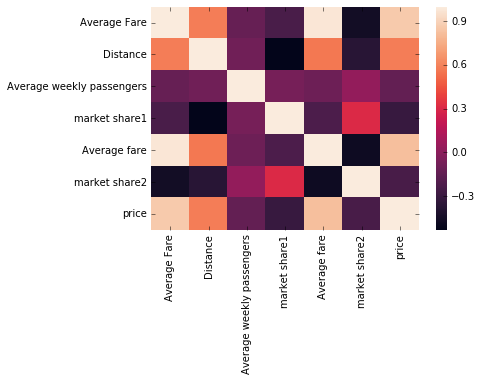

In [11]:
import seaborn as sns
sns.heatmap(airdfnew.corr())


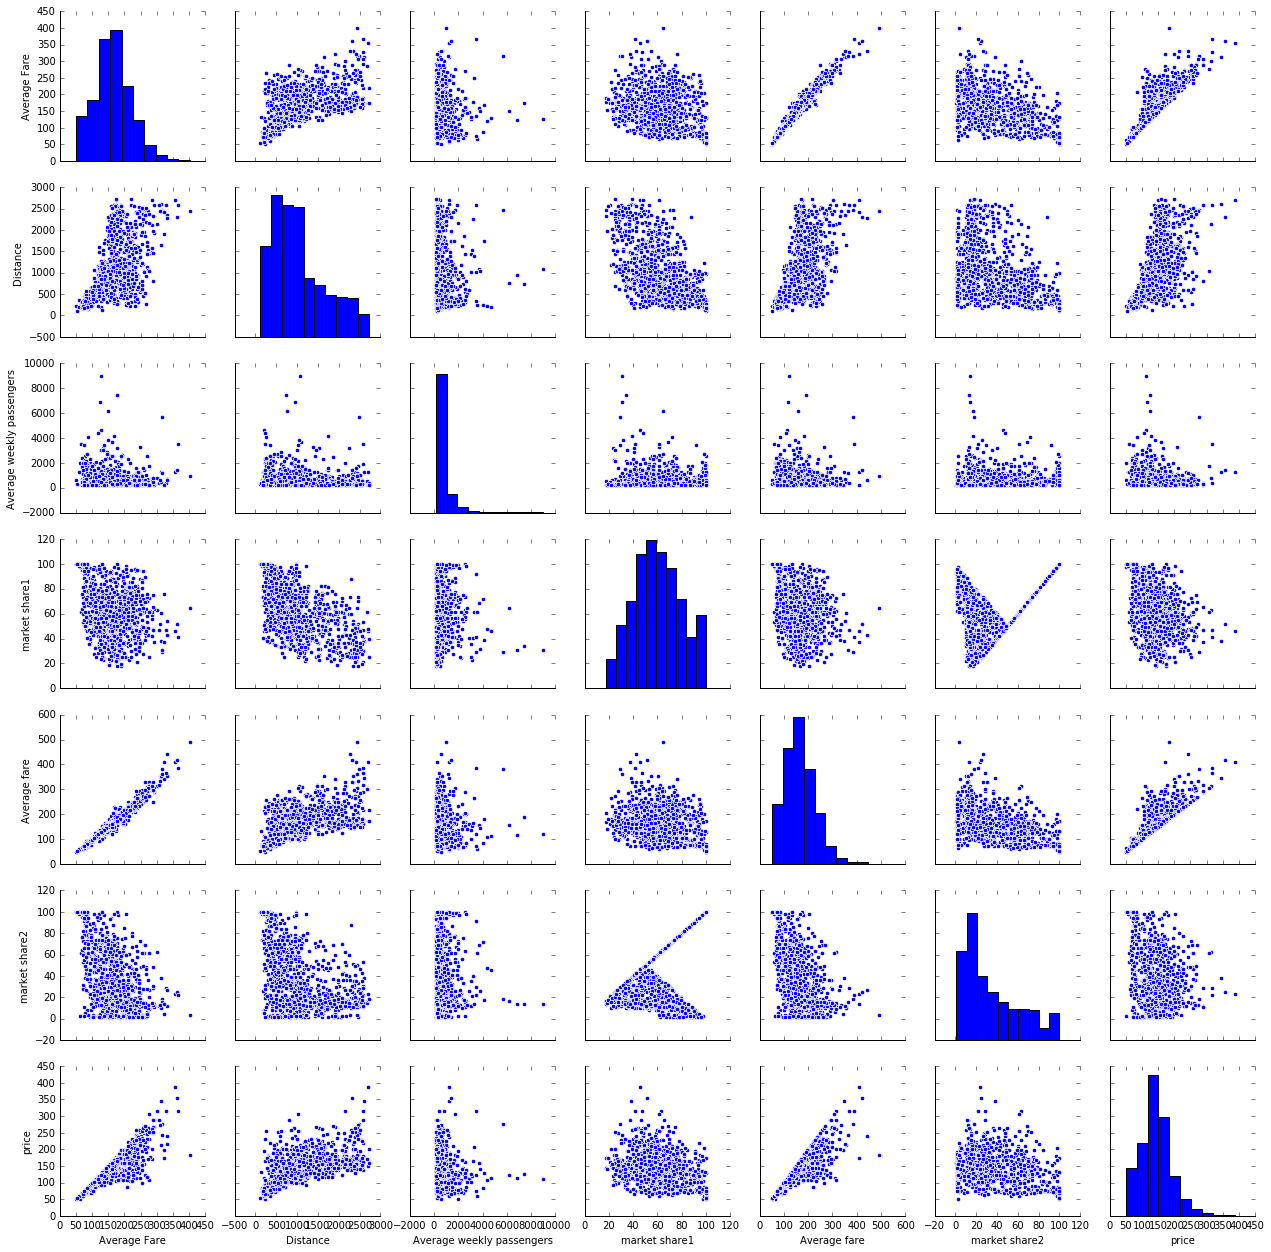

In [12]:
sns.pairplot(airdfnew)

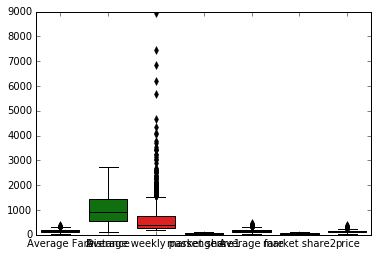

In [13]:
sns.boxplot(data=airdfnew)

In [14]:
Q1 =airdfnew.quantile(0.25)
Q3 = airdfnew.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share1                 27.0000
Average fare                  78.8925
market share2                 39.7775
price                         54.7625
dtype: float64


In [15]:
airdfnew.shape

(1000, 7)

In [16]:
#print(airdfnew < (Q1 - 1.5 * IQR)) |(airdfnew > (Q3 + 1.5 * IQR))
airdfnew_out = airdfnew[~((airdfnew < (Q1 - 1.5 * IQR)) |(airdfnew > (Q3 + 1.5 * IQR))).any(axis=1)]
airdfnew_out.shape


(885, 7)

# airdfnew_out shows that outliers were removed. About 115 rows were removed

# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable

In [17]:
# create X and y
feature_cols = ['Distance', 'Average weekly passengers', 'market share1','Average fare','market share2','price']
X = airdfnew_out[feature_cols]
y = airdfnew_out["Average Fare"]


In [37]:
airdfnew_out.corr()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share1,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share2,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


# Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [38]:
abs(airdfnew_out.corr())<0.1

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
Average Fare,False,False,False,False,False,False,False
Distance,False,False,False,False,False,False,False
Average weekly passengers,False,False,False,True,False,True,False
market share1,False,False,True,False,False,False,False
Average fare,False,False,False,False,False,False,False
market share2,False,False,True,False,False,False,False
price,False,False,False,False,False,False,False


# No columns would be dropped as correlation > 0.1 with the dependent variable

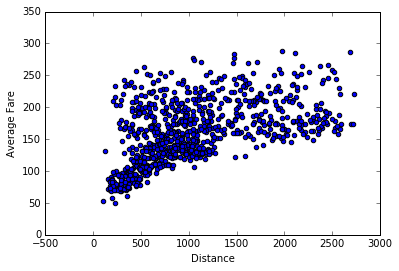

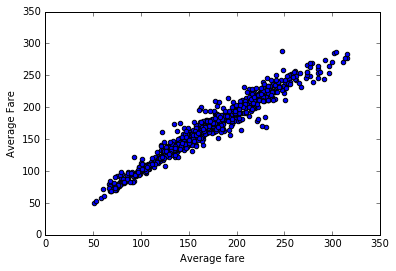

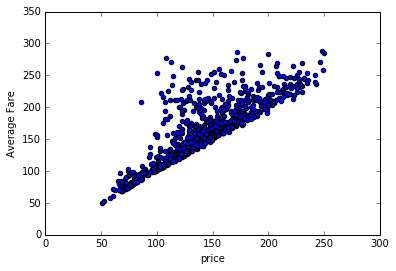

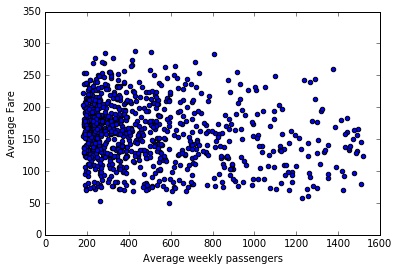

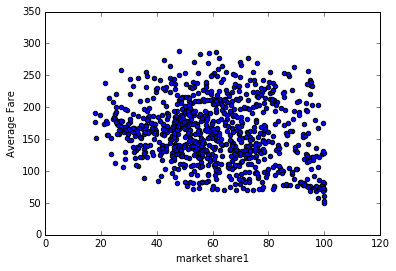

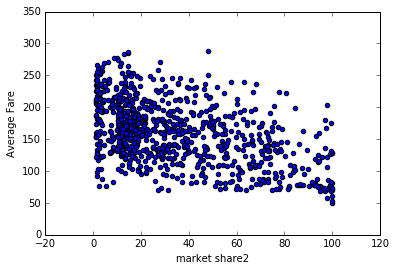

In [39]:
airdfnew_out.plot(kind='scatter', x='Distance', y='Average Fare')
airdfnew_out.plot(kind='scatter', x='Average fare', y='Average Fare')
airdfnew_out.plot(kind='scatter', x='price', y='Average Fare')

airdfnew_out.plot(kind='scatter', x='Average weekly passengers', y='Average Fare')
airdfnew_out.plot(kind='scatter', x='market share1', y='Average Fare')
airdfnew_out.plot(kind='scatter', x='market share2', y='Average Fare')


# Divide the data set into training and test data set and build a Multiple Linear Regression model

In [40]:

from sklearn.model_selection import train_test_split
# consider a split of 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(708, 6) (177, 6)
(708,) (177,)


In [48]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# print intercept 
print("intercept_=",lm.intercept_)

intercept_= 4.08454833898773


In [52]:
#print coefficients
print("coef_=",lm.coef_)

coef_= [ 0.00268056 -0.00340126  0.07798353  0.72985912 -0.03205603  0.23200788]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = lm.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
print("mse=",mse)
rmse = sqrt(mse)
print("rmse=",rmse)

r2score = r2_score(Y_test, y_pred)
print("r2score",r2score)

mse= 72.14252974939156
rmse= 8.49367586792618
r2score 0.9699617495264753


In [57]:
lm.score(X_train, Y_train)

0.9724453942703206

In [58]:
lm.score(X_test, Y_test)

0.9699617495264753

# The Acuracy of the Model = ~97%